# Importando o Pandas e os datasets

Importando a biblioteca pandas e os datasets que usaremos para essa analise

In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv('movies.csv') 
notas = pd.read_csv('ratings.csv')

#Alterando o nome das colunas
filmes.columns = ['filmeId', 'titulo', 'genero']
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [0]:
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Notas medias

Calculando a nota media por filme e o total de avaliacoes de cada um deles

In [0]:
media_notas = notas.groupby('filmeId').agg({'nota': ['mean', 'count']}).round(2)
media_notas.columns = ['nota_media', 'total_avaliacoes']

In [0]:
media_notas.head()

,nota_media,total_avaliacoes
filmeId,,
1,3.92,215
2,3.43,110
3,3.26,52
4,2.36,7
5,3.07,49


# Criando um unico dataset com todos os dados

Fazendo o join entre os datasets carregados para ter as informacoes completas sobre os filmes

In [0]:
nota_media_filmes = filmes.join(media_notas, on='filmeId')

In [0]:
nota_media_filmes.sort_values('nota_media', ascending=False)

,filmeId,titulo,genero,nota_media,total_avaliacoes
7080,69860,Eichmann (2007),Drama|War,5.0,1.0
9122,145994,Formula of Love (1984),Comedy,5.0,1.0
9046,141816,12 Chairs (1976),Adventure|Comedy,5.0,1.0
5497,26366,Harlan County U.S.A. (1976),Documentary,5.0,1.0
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy,5.0,1.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


# Desafio - Filmes sem nota

Encontrando os 18 filmes sem nota neste dataset

In [0]:
nota_media_filmes[nota_media_filmes['total_avaliacoes'].isna()]

,filmeId,titulo,genero,nota_media,total_avaliacoes
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN,NaN
2499,3338,For All Mankind (1989),Documentary,NaN,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN,NaN


# Top 15 filmes com mais avaliacoes

Os 15 filmes com maior numero de avaliacoes no nosso dataset

In [0]:
top15_mais_avaliacoes = nota_media_filmes.sort_values('total_avaliacoes', ascending=False).head(15)

In [0]:
top15_mais_avaliacoes

,filmeId,titulo,genero,nota_media,total_avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


# Relacao entre a quantidade de avaliacoes e a nota media

Plotando uma distribuicao para enteerder se ha alguma relacao entre o total de avaliacoes e a nota media do filme

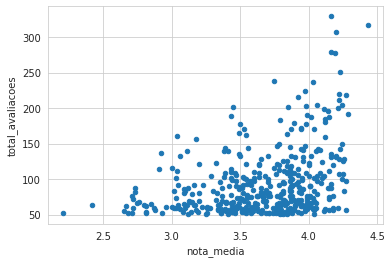

In [0]:
# Considerando apenas os filmes que tem mais de 50 avaliacoes
nota_media_filmes[(nota_media_filmes['total_avaliacoes'] > 50)].plot(x='nota_media', y='total_avaliacoes', kind='scatter')

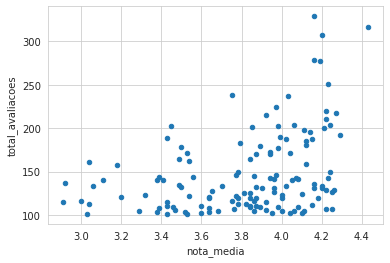

In [0]:
# Considerando apenas os filmes que tem mais de 100 avaliacoes
nota_media_filmes[(nota_media_filmes['total_avaliacoes'] > 100)].plot(x='nota_media', y='total_avaliacoes', kind='scatter')

# Diferentes tipos de genero

Descobrindo quais os tipos unicos de generos temos no dataset

In [0]:
lista_generos = nota_media_filmes['genero'].str.split('|')
generos = set(x for g in lista_generos for x in g)

In [0]:
print('Os generos disponiveis são:')
for i in generos:
  print(i)

Os generos disponiveis são:
Western
Drama
Sci-Fi
Adventure
Film-Noir
Crime
Animation
Thriller
Horror
(no genres listed)
War
Action
Mystery
Romance
Fantasy
Musical
Comedy
IMAX
Children
Documentary


# Total de filmes com determinado genero

Total de vezes que um genero aparece na lista

In [0]:
def countList(lst, x):  
    return sum(x in item for item in lst) 

for i in generos:
  print(i, ': ', countList(lista_generos, i))

Western :  167
Drama :  4361
Sci-Fi :  980
Adventure :  1263
Film-Noir :  87
Crime :  1199
Animation :  611
Thriller :  1894
Horror :  978
(no genres listed) :  34
War :  382
Action :  1828
Mystery :  573
Romance :  1596
Fantasy :  779
Musical :  334
Comedy :  3756
IMAX :  158
Children :  664
Documentary :  440


# Plotando o total de ocorrencias por genero

Grafico de barras com o numero de vezes que um genero aparece no dataset. Lembrando que um filme pode ter mais de um genero 

In [0]:
dict_generos = {} 
for i in generos:
  dict_generos[i] = countList(lista_generos, i)

In [0]:
df_plot = pd.DataFrame.from_dict(dict_generos.items())
df_plot.columns = ['genero', 'total']
df_plot = df_plot.sort_values('total', ascending=False)

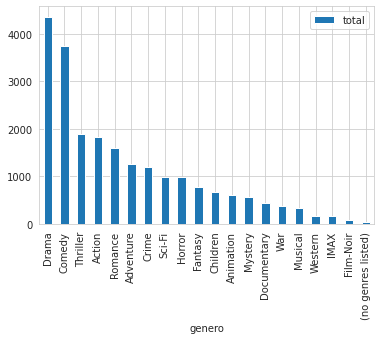

In [0]:
df_plot.plot(x='genero', kind='bar')

# Desafio 1 - Aula 02

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

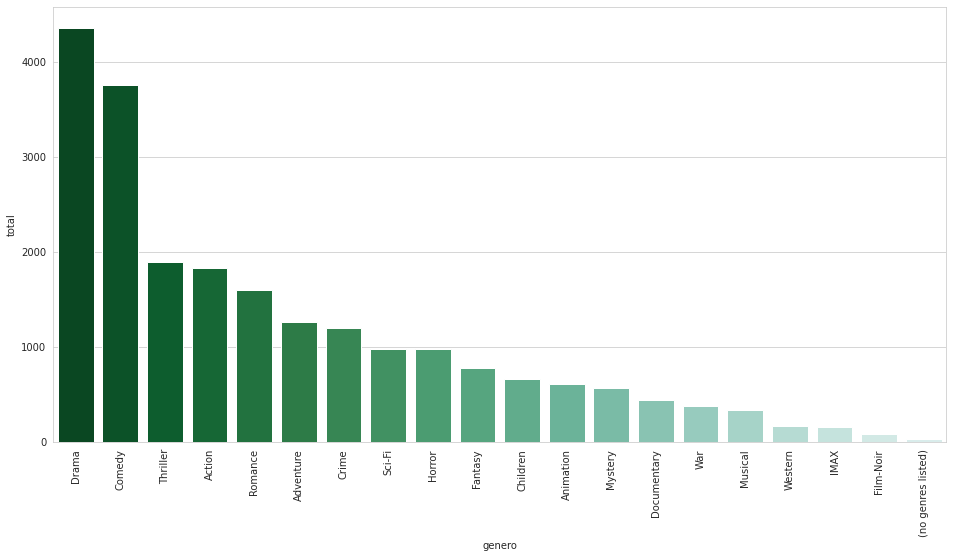

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

plt.figure(figsize=(16,8))
sns.barplot(x=df_plot['genero'],
            y=df_plot['total'],
            palette=sns.color_palette("BuGn_r", n_colors=len(df_plot) + 4),
            )
plt.xticks(rotation='vertical')
plt.show()

# Desafio 2 - Aula 2

Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.



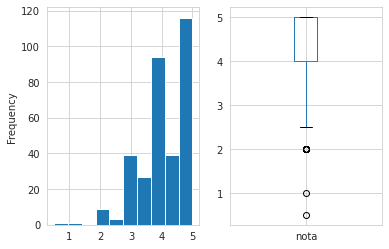

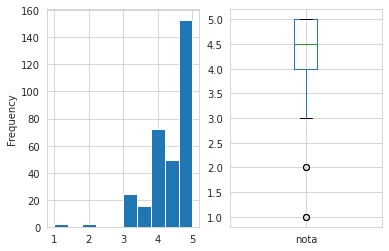

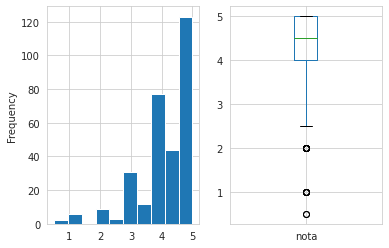

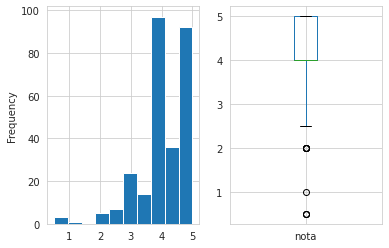

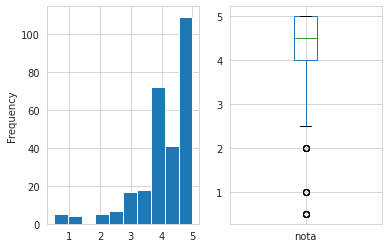

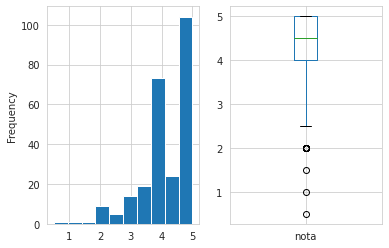

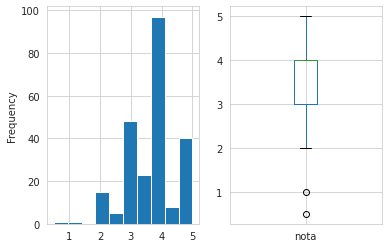

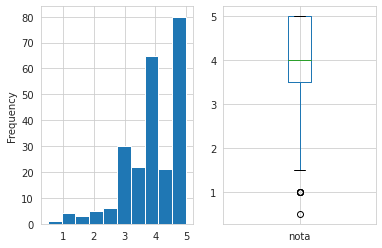

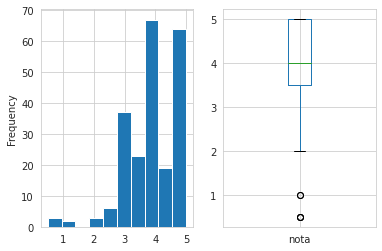

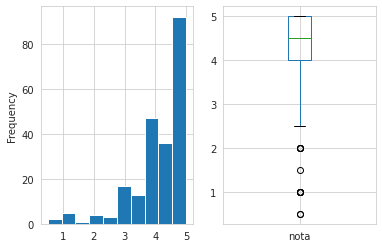

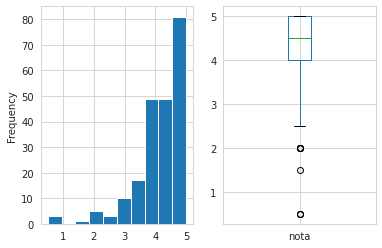

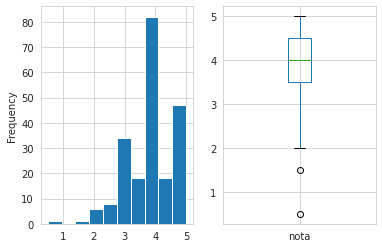

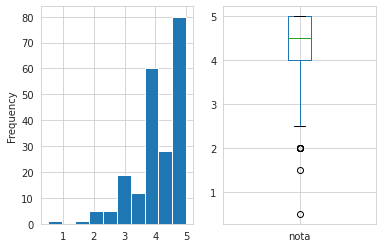

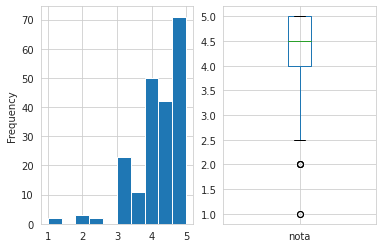

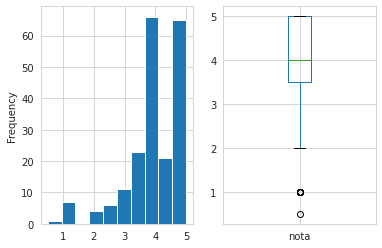

In [0]:
def plot_filme(n):
  notas_do_filme = notas.query(f"filmeId=={n}")["nota"]

  plt.subplot(1,2,1)
  notas_do_filme.plot(kind='hist')

  plt.subplot(1,2,2)
  notas_do_filme.plot.box()
  plt.show()

#Usando o dataset previamente definido com os 15 filmes com maior numero de avaliacoes
for i  in top15_mais_avaliacoes['filmeId']:
  plot_filme(i)

# Desafio 3 - Aula 2

Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
notas_top10 = notas[notas['filmeId'].isin(top15_mais_avaliacoes['filmeId'].head(10))]

boxplot_notas_top10 = notas_top10.merge(filmes, on='filmeId', how='left')

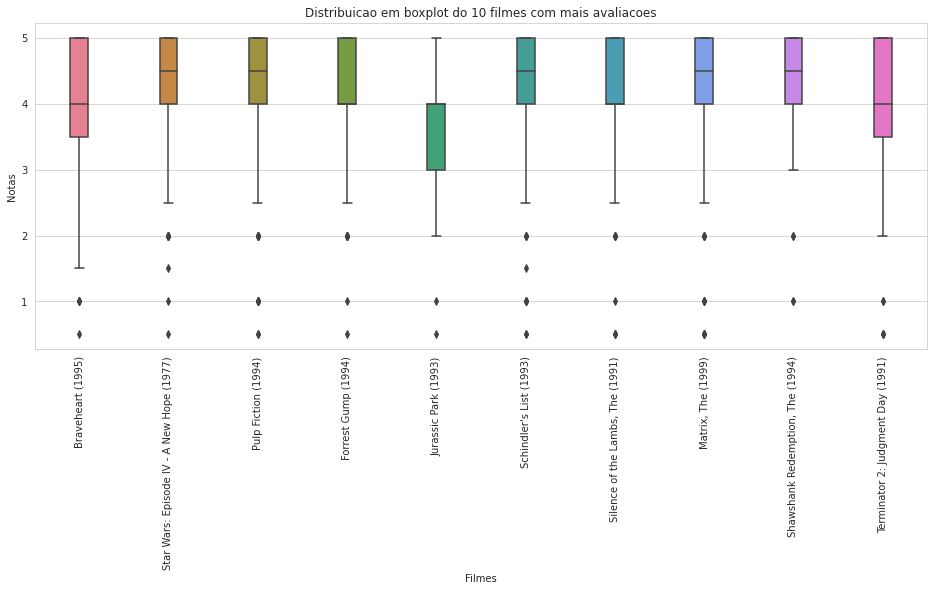

In [0]:
plt.figure(figsize=(16,6))
sns.boxplot(data=boxplot_notas_top10, 
            x='titulo', 
            y='nota',
            width=0.2,
            palette="husl")
plt.xticks(rotation='vertical')
plt.title('Distribuicao em boxplot do 10 filmes com mais avaliacoes')
plt.xlabel('Filmes')
plt.ylabel('Notas')
plt.show()